In [2]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import math
from scipy import stats
import pandas as pd
import matplotlib as mpl
import datetime as dt
from pandas_datareader import data as pdr
import plotly.offline as plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import yfinance as yf
yf.pdr_override()
import os
plotly.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'
import wrds
from sklearn.preprocessing import StandardScaler

# plt.style.use(['science', 'notebook'])

### Importing DataFrames & changing index to date time

In [3]:
df_close_clean = pd.read_csv('data/df_close_clean.csv')
df_open_clean = pd.read_csv('data/df_open_clean.csv')
df_volume_clean = pd.read_csv('data/df_volume_clean.csv')
df_shares_outstanding_clean = pd.read_csv('data/df_shares_outstanding_clean.csv')
df_volume_clean_wrds = pd.read_csv('data/df_volume_clean_WRDS.csv')

# change index to datetime
df_close_clean.index = pd.to_datetime(df_close_clean['Date'])
df_open_clean.index = pd.to_datetime(df_open_clean['Date'])
df_volume_clean.index = pd.to_datetime(df_volume_clean['Date'])
df_shares_outstanding_clean.index = pd.to_datetime(df_shares_outstanding_clean['Date'])
df_volume_clean_wrds.index = pd.to_datetime(df_volume_clean_wrds['Date'])

# Remove the "Date" column as it no longer has any use
df_close_clean = df_close_clean.drop(columns=['Date'])
df_open_clean = df_open_clean.drop(columns=['Date'])
df_volume_clean = df_volume_clean.drop(columns=['Date'])
df_shares_outstanding_clean = df_shares_outstanding_clean.drop(columns=['Date'])
df_volume_clean_wrds = df_volume_clean_wrds.drop(columns=['Date'])

# testing if the index is datetime and the "Date" column is removed
assert 'Date' not in df_close_clean.columns
assert 'Date' not in df_open_clean.columns
assert 'Date' not in df_volume_clean.columns
assert 'Date' not in df_shares_outstanding_clean.columns
assert 'Date' not in df_volume_clean_wrds.columns
assert df_close_clean.index.dtype == 'datetime64[ns]'
assert df_open_clean.index.dtype == 'datetime64[ns]'
assert df_volume_clean.index.dtype == 'datetime64[ns]'
assert df_shares_outstanding_clean.index.dtype == 'datetime64[ns]'
assert df_volume_clean_wrds.index.dtype == 'datetime64[ns]'

In [36]:
flat_vol = np.sort(df_volume_clean.values.flatten())
np.count_nonzero(flat_vol == 2)

0

In [52]:
volume_flat = df_volume_clean.values.flatten()
volume_flat = volume_flat[np.where(volume_flat != 0)]
vol_mean = np.mean(volume_flat)
print(vol_mean)
vol_sum = np.sum(volume_flat)
normalized_vol = volume_flat/vol_mean
sorted_vol = np.sort(normalized_vol)
print(sorted_vol[0:50])
print(sorted_vol[len(sorted_vol)-50:len(sorted_vol)])

5364467.902905552
[1.86411778e-05 1.86411778e-05 1.86411778e-05 1.86411778e-05
 1.86411778e-05 1.86411778e-05 1.86411778e-05 1.86411778e-05
 1.86411778e-05 1.86411778e-05 1.86411778e-05 1.86411778e-05
 1.86411778e-05 1.86411778e-05 1.86411778e-05 1.86411778e-05
 1.86411778e-05 1.86411778e-05 1.86411778e-05 1.86411778e-05
 1.86411778e-05 1.86411778e-05 1.86411778e-05 1.86411778e-05
 1.86411778e-05 1.86411778e-05 1.86411778e-05 1.86411778e-05
 1.86411778e-05 1.86411778e-05 1.86411778e-05 1.86411778e-05
 1.86411778e-05 1.86411778e-05 1.86411778e-05 1.86411778e-05
 1.86411778e-05 1.86411778e-05 1.86411778e-05 1.86411778e-05
 1.86411778e-05 1.86411778e-05 1.86411778e-05 1.86411778e-05
 1.86411778e-05 1.86411778e-05 1.86411778e-05 1.86411778e-05
 1.86411778e-05 1.86411778e-05]
[108.63250756 109.01006597 109.22022661 109.48903239 110.34399137
 110.67386566 110.79078312 111.51376256 112.06069472 112.44433016
 113.00229789 113.53468993 113.57592422 114.94532378 118.02818312
 118.52195064 119.01

No handles with labels found to put in legend.


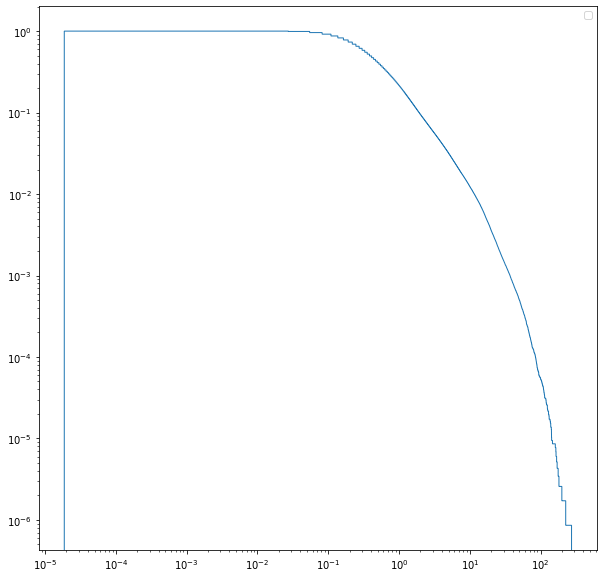

In [51]:
x = np.arange(0, len(sorted_vol), 1)
plt.scatter(x, sorted_vol)
plt.show()
# non-log plot
plt.figure(figsize=(10,10))
plt.hist(sorted_vol, bins=10000, cumulative=-1, density=True, log=True, histtype='step')
plt.gca().set_xscale("log")
plt.legend()
plt.show()

In [49]:
vol_mean = np.mean(df_volume_clean.values.flatten())
df_vol_sum = df_volume_clean.sum().sum()
df_normalized_vol = df_volume_clean/vol_mean
sorted_vol = np.sort(df_normalized_vol.values.flatten())
sorted_vol = sorted_vol[np.where(sorted_vol != 0)]
print('start', sorted_vol[0:50])
print('end', sorted_vol[len(sorted_vol)-50:len(sorted_vol)])

start [1.86609619e-05 1.86609619e-05 1.86609619e-05 1.86609619e-05
 1.86609619e-05 1.86609619e-05 1.86609619e-05 1.86609619e-05
 1.86609619e-05 1.86609619e-05 1.86609619e-05 1.86609619e-05
 1.86609619e-05 1.86609619e-05 1.86609619e-05 1.86609619e-05
 1.86609619e-05 1.86609619e-05 1.86609619e-05 1.86609619e-05
 1.86609619e-05 1.86609619e-05 1.86609619e-05 1.86609619e-05
 1.86609619e-05 1.86609619e-05 1.86609619e-05 1.86609619e-05
 1.86609619e-05 1.86609619e-05 1.86609619e-05 1.86609619e-05
 1.86609619e-05 1.86609619e-05 1.86609619e-05 1.86609619e-05
 1.86609619e-05 1.86609619e-05 1.86609619e-05 1.86609619e-05
 1.86609619e-05 1.86609619e-05 1.86609619e-05 1.86609619e-05
 1.86609619e-05 1.86609619e-05 1.86609619e-05 1.86609619e-05
 1.86609619e-05 1.86609619e-05]
end [108.74780037 109.12575949 109.33614318 109.60523425 110.4611006
 110.79132498 110.90836654 111.63211328 112.1796259  112.5636685
 113.12222841 113.65518548 113.69646353 115.06731645 118.15344766
 118.64773922 119.13785073 119

In [6]:
df_volume_clean.sum().sum()

6247448590788

### Velocity calculation

We do the velocity calculation on the real data a fashion similar as Feng et. al's 2012 paper, in the following steps:
1. Divide the total number of shares traded on the market(volume) by the number of outstanding shares of each stock every day
2. Resample the dataframe into a yearly timeframe
3. Sum up the yearly velocity per stock and divide it by the amount of years used in the dataframe which results in the mean velocity per stock
4. Take the mean of all the mean of the different stocks

In [4]:
# Step 1
velocity_df_daily = df_volume_clean_wrds/df_shares_outstanding_clean

# Step 2
velocity_yearly_df = velocity_df_daily.resample('Y').sum()

# Step 3 + 4
sum_velocity_yearly_df = velocity_yearly_df.apply(lambda x: x.sum())/velocity_yearly_df.shape[0] # .shape[0] = amount of rows 
V = sum_velocity_yearly_df.mean()

In [5]:
def probability_of_trading(V_f:float, V:float) -> float:
    """returns the probability of trading for a given velocity of fundamental traders and total market velocity V"""
    # V is total market velocity, V_f is the velocity of fundamental traders, V_c is the velocity of technical traders
    # We assume that the proportion of shares held by fundamental traders is the same as in the period 1997-2006, namely 83% on average. 
    # This might be a bit strong, but we continue with this assumption for now.
    # thus the velocity of technical traders is V_C is given by:
    V_c = (V - 0.83*V_f)/(1-0.83)
    # because there are around 250 trading days in a year, we arrive at probability of trading p as follows:
    p = V_c/(250*2)
    return p


In [6]:
# multiple choices of V_F, in the paper they chose V_f = 0.4 as an arbirtrary choice which achieved best fit
V_f_list = [0.2, 0.4, 0.6, 0.8]

print("The V value is", V)
for V_f in V_f_list:
    p = probability_of_trading(V_f, V)
    print('V_f: ' + str(V_f), 'gives a p value of', p)


The V value is 2.1835498511136326
V_f: 0.2 gives a p value of 0.02373588060133685
V_f: 0.4 gives a p value of 0.02178293942486626
V_f: 0.6 gives a p value of 0.019829998248395674
V_f: 0.8 gives a p value of 0.017877057071925082


# Model parameters

In [7]:
# other parameters
n = 2**10
t = 10000
p = 0.02178
omega = 1
b = 1.5
size = 1
k = 1
M = 500
d = 1.12

# Model definition: ABM

In [8]:
# agent behaviors for buying, selling and holding based on the probability of trading p
def buy_sell_hold(p):
    assert p <= 0.5, "p should be smaller than 0.5"
    p_b = p # buy/sell
    p_s = p
    p_h = 1 - 2*p # hold
    dice = rnd.uniform(0, 1)
    # if the dice rolls below p, roll a 50/50 dice to decide buy or sell
    if dice <= 2*p:
        if rnd.choice([0, 1]) == 0:
            psi = 1
        else:
            psi = -1
    else:
        psi = 0
    return psi

In [9]:
class Agent:
    def __init__(self, size) -> None:
        self.size = size

class Model:
    def __init__(self, p: float, n: int, size: int, k: int, omega: int) -> None:
        self.n = n
        self.p = p
        self.agents = [Agent(size) for i in range(n)]
        self.daily_return = []
        self.trading_volume = 0
        self.k = k
        self.omega = omega
        self.daily_returns = []
        self.count = 0

        self.daily_trading_volumes = []

        
    def distribute_opinion_groups(self) -> None:

        # number of opinion groups
        if sum(self.daily_return) != 0:
            c = (self.n // abs(sum(self.daily_return))) ** self.omega
        else:
            c = self.n
            
        # rounding down c to the nearest integer
        c = math.floor(c)
        
        opinion_groups = [[] for i in range(c)]
        opinion_agents = self.agents.copy()

        # distribute agents evenly
        for opinion_group in opinion_groups:
            for i in range(round(self.n / c)):
                if len(opinion_agents) > 0:
                    i = rnd.choice([i for i in range(len(opinion_agents))])

                    opinion_group.append(opinion_agents[i])
                    del opinion_agents[i]
                else:
                    break
                
        return opinion_groups
    

    def step(self):
        self.count += 1
        opinion_groups = self.distribute_opinion_groups()
        self.daily_return = []
        self.trading_volume = 0

        for opinion_group in opinion_groups:
            psi = buy_sell_hold(self.p)
            self.daily_return.append(psi * len(opinion_group))
            self.trading_volume += abs(psi * len(opinion_group))
    
        self.daily_returns.append(sum(self.daily_return) * k)
        self.daily_trading_volumes.append(self.trading_volume)

        return self.count

In [10]:
# model w noise
class Model:
    def __init__(self, p: float, n: int, size: int, k: int, omega: int, b: int) -> None:
        self.n = n
        self.p = p
        self.agents = [Agent(size) for i in range(n)]
        self.daily_return = []
        self.trading_volume = 0
        self.k = k
        self.omega = omega
        self.daily_returns = []
        self.count = 0
        self.b = b

        self.daily_trading_volumes = []

        
    def distribute_opinion_groups(self) -> None:
        if self.b == 0:
        
            # number of opinion groups
            if sum(self.daily_return) != 0:
                c = (self.n // abs(sum(self.daily_return))) ** self.omega
            else:
                c = self.n

             # rounding down c to the nearest integer
            c = math.floor(c)
            
        
            opinion_groups = [[] for i in range(round(c))]
            opinion_agents = self.agents.copy()

            # distribute agents evenly
            for opinion_group in opinion_groups:
                for i in range(round(self.n / c)):
                    if len(opinion_agents) > 0:
                        i = rnd.choice([i for i in range(len(opinion_agents))])

                        opinion_group.append(opinion_agents[i])
                        del opinion_agents[i]
                    else:
                        break

        else:
            if sum(self.daily_return) != 0:
                mean = (self.n // abs(sum(self.daily_return))) ** self.omega
            else:
                mean = self.n
                
            
            c = np.random.normal(loc = mean, scale = mean * self.b)

             # rounding down c to the nearest integer
            c = math.floor(c)

            opinion_groups = [[] for i in range(round(c))]
            opinion_agents = self.agents.copy()

            # distribute agents evenly
            for opinion_group in opinion_groups:
                for i in range(round(self.n / c)):
                    if len(opinion_agents) > 0:
                        i = rnd.choice([i for i in range(len(opinion_agents))])

                        opinion_group.append(opinion_agents[i])
                        del opinion_agents[i]
                    else:
                        break            
                
        return opinion_groups

    def step(self):
        self.count += 1
        opinion_groups = self.distribute_opinion_groups()
        self.daily_return = []
        self.trading_volume = 0

        for opinion_group in opinion_groups:
            psi = buy_sell_hold(self.p)
            self.daily_return.append(psi * len(opinion_group))
            self.trading_volume += abs(psi * len(opinion_group))
    
        self.daily_returns.append(sum(self.daily_return) * k)
        self.daily_trading_volumes.append(self.trading_volume)

        return self.count

# ABM test run

In [11]:
# ABM simulation
model_test = Model(p, n, size, k, omega, b)
for i in range(t):
    model_test.step()


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 4.000e+00, 1.000e+00, 1.000e+00, 3.000e+00,
        1.000e+00, 0.000e+00, 6.000e+00, 5.000e+00, 3.000e+00, 3.000e+00,
        9.000e+00, 6.000e+00, 8.000e+00, 2.200e+01, 1.900e+01, 3.400e+01,
        5.300e+01, 6.700e+01, 7.600e+01, 2.040e+02, 4.020e+02, 8.830e+02,
        5.953e+03, 1.177e+03, 4.180e+02, 2.790e+02, 1.410e+02, 4.700e+01,
        4.700e+01, 3.400e+01, 1.900e+01, 2.100e+01, 1.400e+01, 7.000e+00,
        4.000e+00, 6.000e+00, 1.000e+0

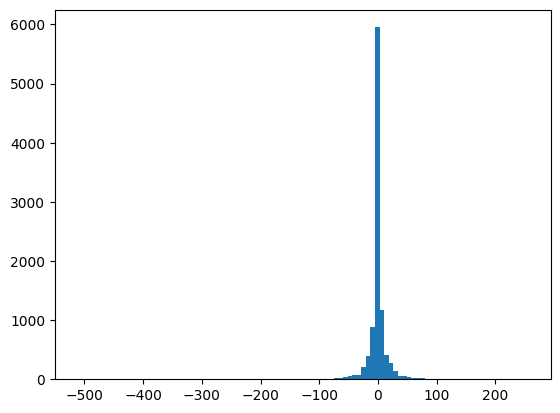

In [12]:
plt.hist(model_test.daily_returns, bins = 100)

In [13]:
# Nitai's variabe transformations:
# converting data to array, taking asolute value, and normalizing with standard scaler to zero mean and unit variance, using sklearn StandardScaler. reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
array_AMB_returns = np.array(model_test.daily_returns)
abs_AMB_returns = np.abs(array_AMB_returns)
# checking if abs transformation worked
assert abs_AMB_returns.min() == 0
scaler = StandardScaler()
scaled_abs_ABM_returns = scaler.fit_transform(abs_AMB_returns.reshape(-1, 1))
# checking if standard scaling worked
assert abs_AMB_returns.max() > scaled_abs_ABM_returns.max()

In [14]:
log_scaled_abs_AMB_returns = np.log(scaled_abs_ABM_returns)

C:\Users\Nitai Nijholt\AppData\Local\Temp\ipykernel_24044\1685117646.py:1: RuntimeWarning:

invalid value encountered in log



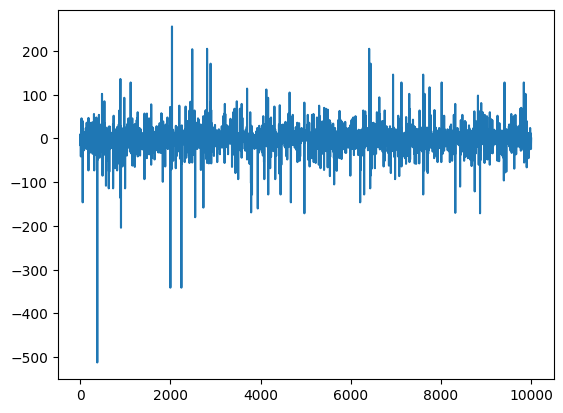

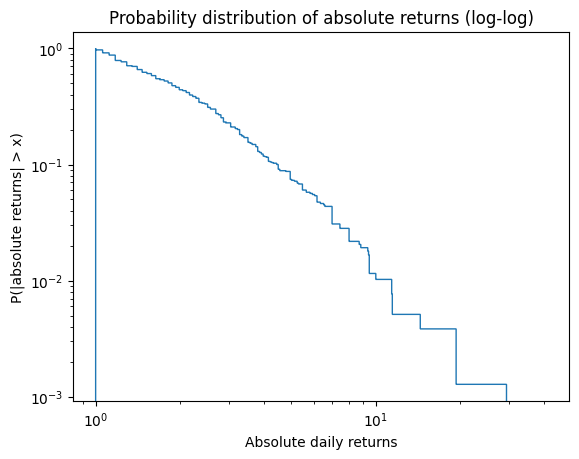

In [15]:
# logarithmic bins
bin=np.logspace(start=0, stop=np.log(5), num=t)

#Yonas' code: normalising returns
# returns = [(abs(day) - np.mean(model_test.daily_returns)) / np.std(model_test.daily_returns) for day in model_test.daily_returns]

# Nitai's code: normalised returns
returns = scaled_abs_ABM_returns


plt.plot(model_test.daily_returns)
plt.show()

plt.figure(1)
plt.hist(returns, bin, cumulative=-1, density=True, log=True, histtype='step')
plt.title("Probability distribution of absolute returns (log-log)")
plt.xlabel("Absolute daily returns")
plt.ylabel("P(|absolute returns| > x)")
plt.gca().set_xscale("log")
plt.show()


# Model definition: Stochastic model

In [16]:
class Stochastic_Model:
    def __init__(self, n: int, p: float, init: int, time_horizon: bool, M, d):
        self.returns = [init]
        self.n = n
        self.p = p
        self.time_horizon = time_horizon
        self.M = M
        self.d = d

    def time_horizons(self):
        time_horizons = []
        alpha = []

        # distribution of agents in different time horizons
        # agents are allocated to each time horizon (with exponential decay as we go back in time), until we reach the limit M
        # or until we reach the beginning of the simulation (if current timestep t < M)
        for i in range(1, self.M + 1):
            if len(self.returns) == 1:
                value = (i ** -self.d) * abs(self.returns[-1])
                alpha_val = (i ** -self.d)
                time_horizons.append(value)
                alpha.append(alpha_val)

            elif i >= len(self.returns):
                value = (i ** -self.d) * abs(self.returns[-1] - self.returns[0])
                alpha_val = (i ** -self.d)
                time_horizons.append(value)
                alpha.append(alpha_val)

            else:
                value = (i ** -self.d) * abs(self.returns[-1] - self.returns[-1-i])
                alpha_val = (i ** -self.d)
                time_horizons.append(value)
                alpha.append(alpha_val)

        return sum(time_horizons) * (sum(alpha) ** -1)

    def step(self):

        # Agents only factor in the returns at the previous timestep
        if self.time_horizon == False:
            variance  = 2 * p * n * abs(self.returns[-1])
            std = math.sqrt(variance)
            value = std * np.random.normal(0.0, 1.0)
            self.returns.append(value)
        
        # Agents look back M timesteps
        if self.time_horizon == True:
            horizons = self.time_horizons()
            variance  = 2 * p * n * horizons
            std = math.sqrt(variance)
            value = std * np.random.normal(0.0, 1.0)
            self.returns.append(value)  

# Stochastic model test run

In [17]:
# Stochastic simulation

stochastic = Stochastic_Model(n, p, 10, time_horizon=False, M=10, d=1.12)
stochastic_horizons = Stochastic_Model(n, p, 10, time_horizon=True, M=10, d=1.12)

for i in range(t):
    stochastic.step()
    stochastic_horizons.step()

In [18]:
# Nitai's variabe transformations:
# changing datatype to array
stochastic_returns_array = np.array(stochastic.returns)
stochastic_returns_horizons_array = np.array(stochastic_horizons.returns)
# taking absolute value
stochastic_returns_abs = np.abs(stochastic_returns_array)
stochastic_returns_horizons_abs = np.abs(stochastic_returns_horizons_array)
# normalizing with standard scaler
scaler = StandardScaler()
scaled_stochastic_returns = scaler.fit_transform(stochastic_returns_abs.reshape(-1, 1))
scaled_stochastic_returns_horizons = scaler.fit_transform(stochastic_returns_horizons_abs.reshape(-1, 1))


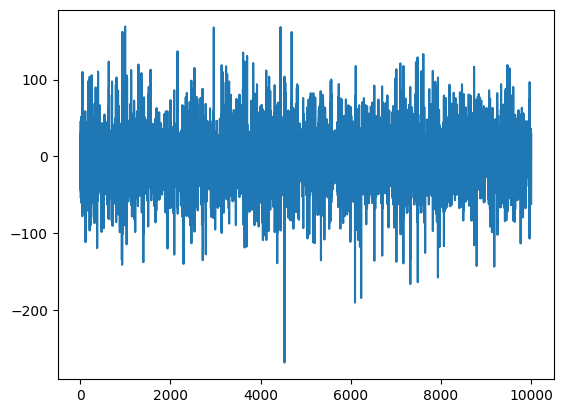

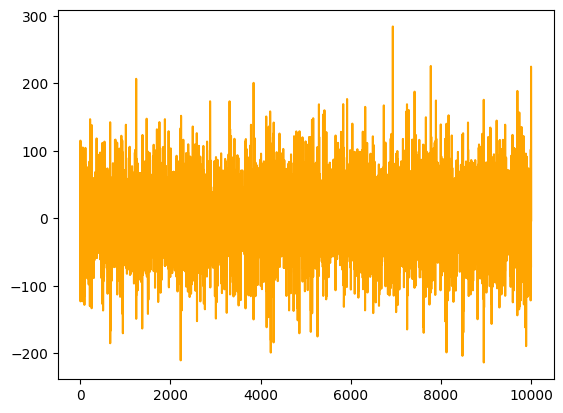

(199,)


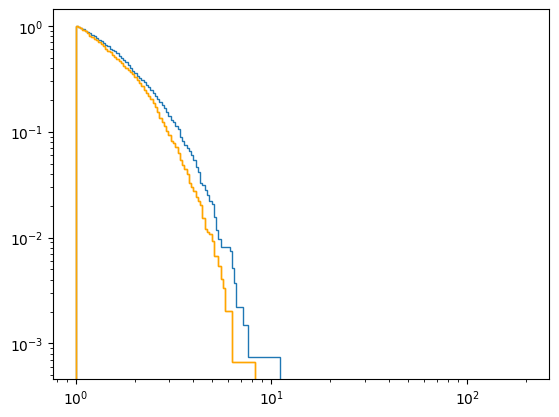

In [19]:
#stochastic simulation return plots
plt.plot(range(t + 1), stochastic.returns)
plt.show()

plt.plot(range(t+1), stochastic_horizons.returns, color='orange')
plt.show()

# Yona's code: normalizing returns
# abs_returns = [(abs(i) - np.mean(stochastic.returns)) / (np.std(stochastic.returns)) for i in stochastic.returns]
# abs_returns_horizons = [(abs(i) - np.mean(abs_returns)) / (np.std(stochastic.returns)) for i in stochastic_horizons.returns]

# Nitai's code: returns normalized previously
abs_returns = scaled_stochastic_returns
abs_returns_horizons = scaled_stochastic_returns_horizons


bin=np.logspace(start=0, stop=np.log(10), num=200)

plt.hist(abs_returns, bins=bin, cumulative=-1, density=True, log=True, histtype='step')
plt.hist(abs_returns_horizons, bin, cumulative=-1, density=True, log=True, histtype='step', color = 'orange')
bins_heights = plt.hist(abs_returns_horizons, bin, cumulative=-1, density=True, log=True, histtype='step', color = 'orange')[0]
print(bins_heights.shape)
plt.gca().set_xscale("log")
plt.show()

# Simulation functions

In [20]:
# (self, n: int, p: float, init: int, time_horizon: bool, M, d)

In [21]:
def run_ABM(p, n, size, k, omega, b, t, runs):
    ''' Runs the ABM model for a given number of runs and time steps. Returns a list of lists of daily returns and a list of lists of trading volume.'''
    ABM_sim_results_returns = []
    ABM_sim_results_volume = []
    for run in range(runs):
        model = Model(p, n, size, k, omega, b)
        for i in range(t):
            model.step()
        ABM_sim_results_returns.append(model.daily_returns)
        ABM_sim_results_volume.append(model.trading_volume)    
    ABM_sim_results_returns_array = np.array(ABM_sim_results_returns)
    ABM_sim_results_volume_array = np.array(ABM_sim_results_volume)
    return ABM_sim_results_returns_array, ABM_sim_results_volume_array
        

In [35]:
def run_Stochastic_Model(n: int, p: float, init: int, time_horizon: bool, M, d, t, runs):
    ''' Runs the stochastic model for a given number of runs and time steps, outputs a list of lists of daily returns and a list of lists of trading volume.'''
    Stochastic_Model_sim_results_returns = []
    Stochastic_Model_sim_results_volume = []
    for run in range(runs):
        model = Stochastic_Model(n=n, p=p, init=10, time_horizon=time_horizon, M=M, d=d)
        # model = Stochastic_Model(n, p, init, time_horizon, M, d)
        for i in range(t):
            model.step()
        Stochastic_Model_sim_results_returns.append(model.returns)
        Stochastic_Model_sim_results_volume.append(model.trading_volume)
    Stochastic_Model_sim_results_return_array = np.array(Stochastic_Model_sim_results_returns)
    Stochastic_Model_sim_results_volume_array = np.array(Stochastic_Model_sim_results_volume)
    return Stochastic_Model_sim_results_return_array, Stochastic_Model_sim_results_volume_array

# Running multiple ABM simulation runs:

In [23]:
results_ABM_10_runs = run_ABM(p, n, size, k, omega, b, t, 10)

### Returns ABM model across 10 runs:

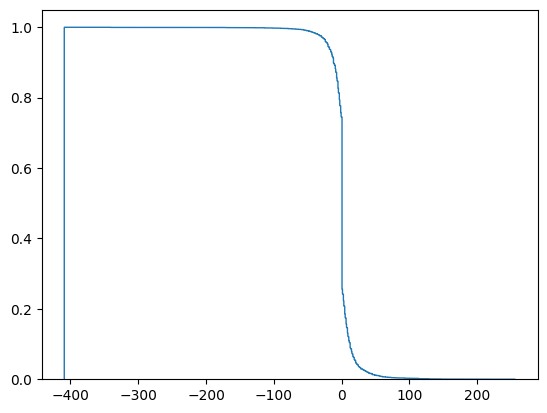

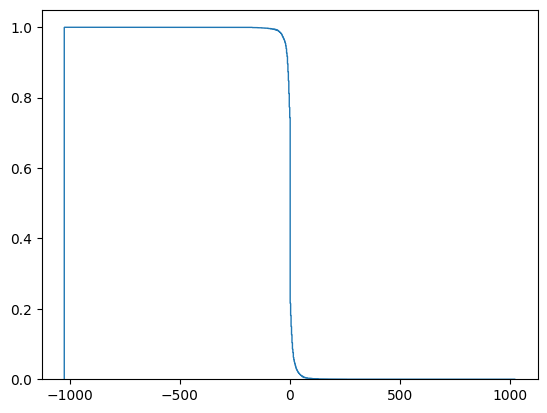

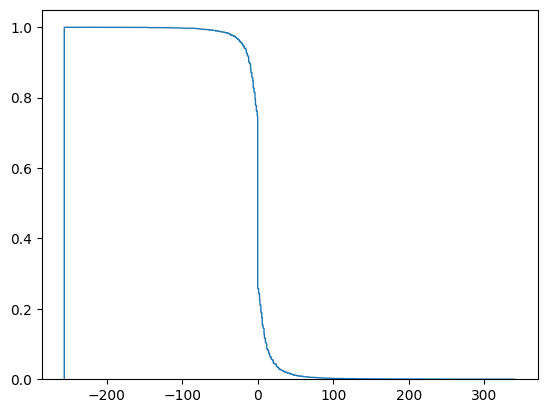

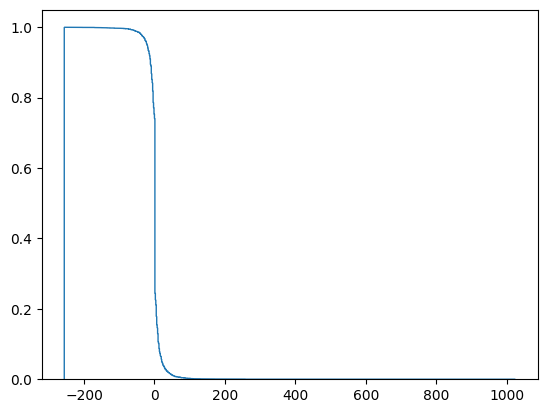

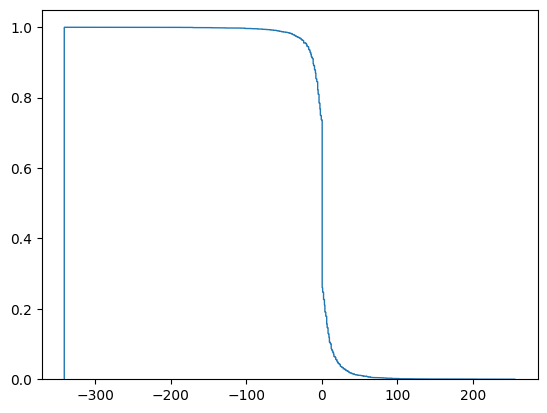

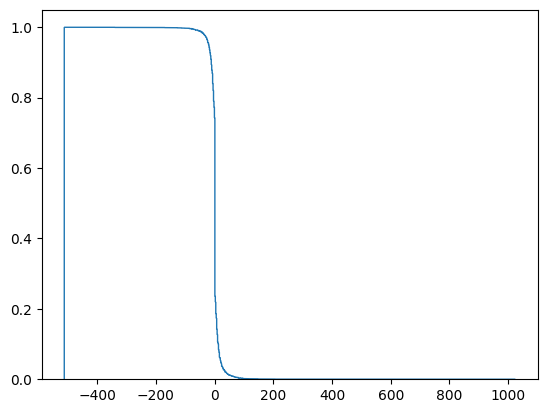

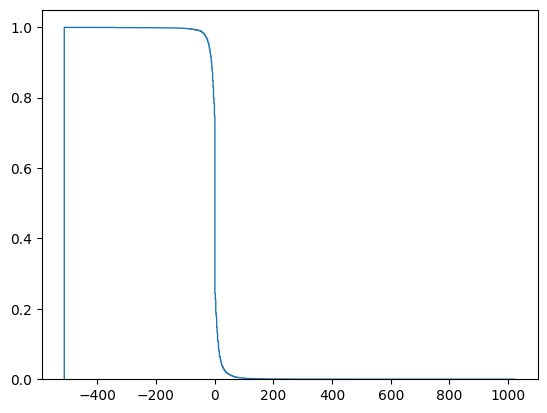

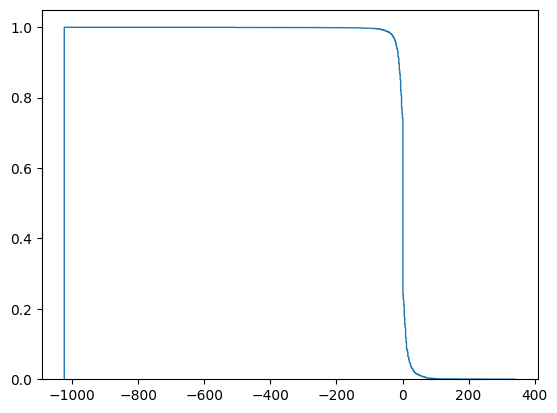

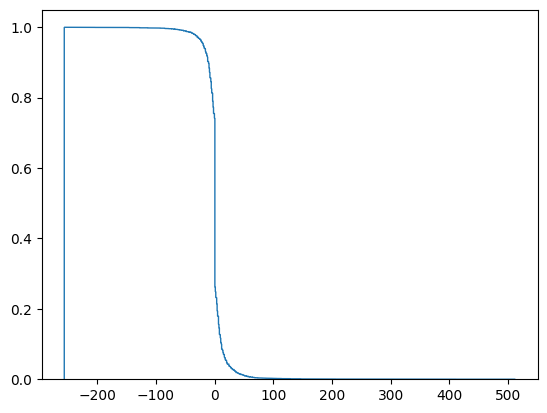

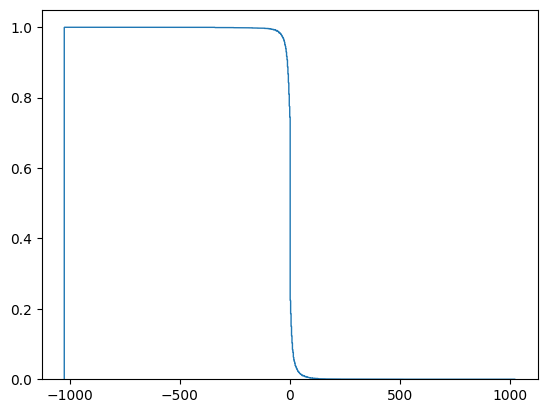

In [32]:
for daily_return_results in results_ABM_10_runs[0]:
    plt.hist(daily_return_results, bins = 1000, density = True, cumulative = -1, histtype = 'step')
    plt.show()

### VolumeABM model across 10 runs:

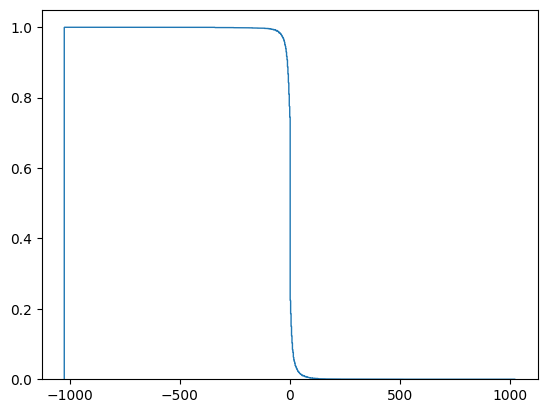

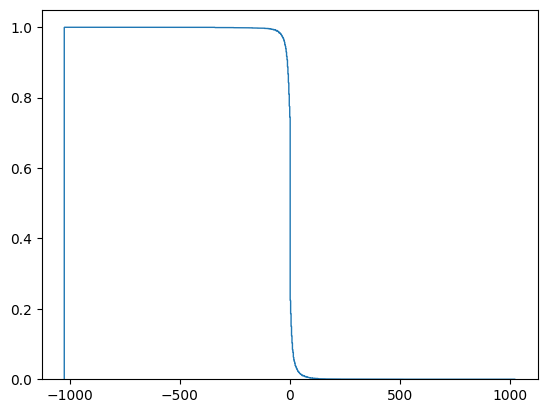

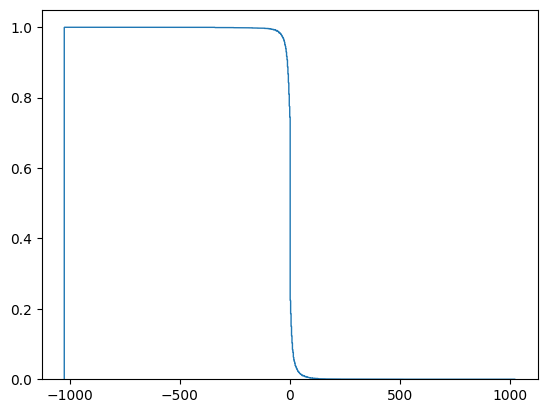

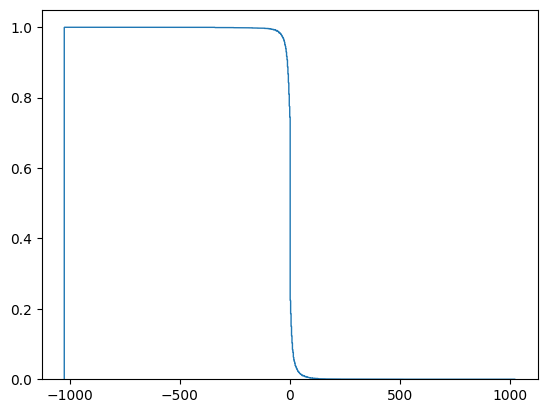

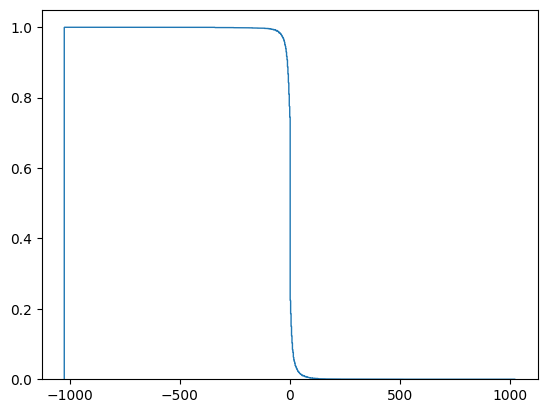

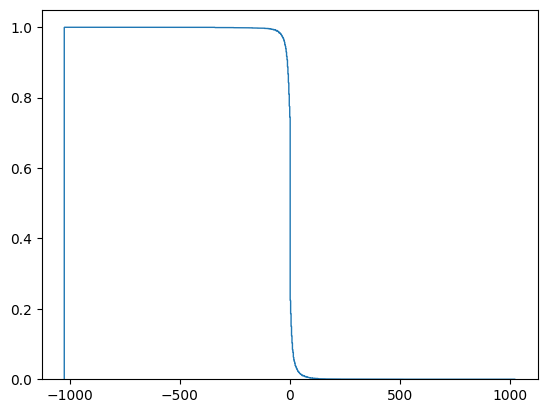

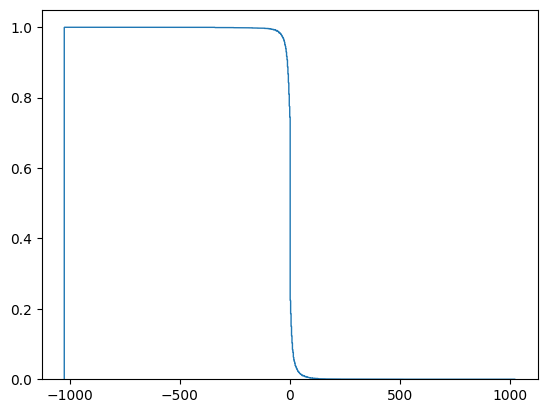

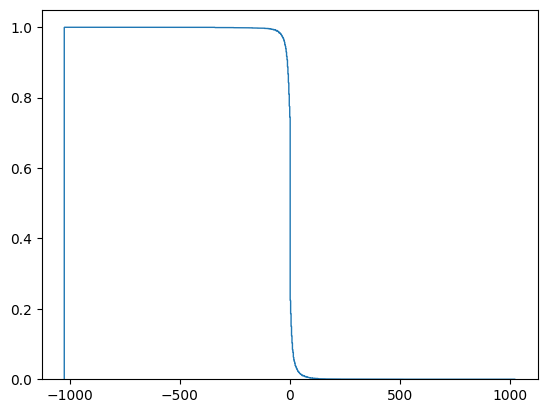

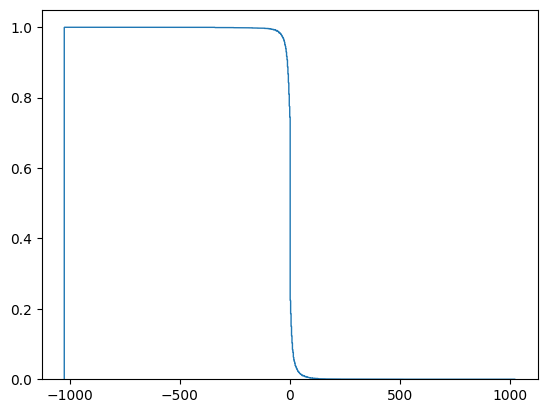

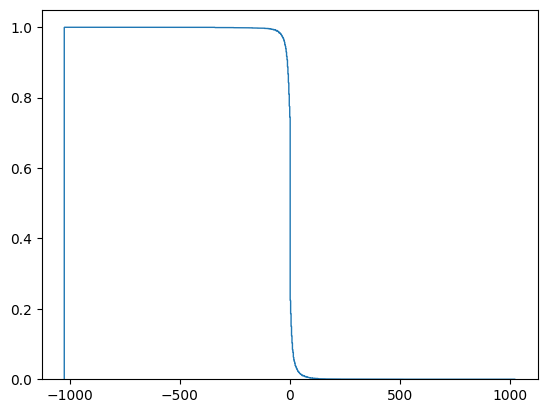

In [31]:
for daily_volume_results in results_ABM_10_runs[1]:
    plt.hist(daily_return_results, bins = 1000, density = True, cumulative = -1, histtype = 'step')
    plt.show()

### Returns Stochastic Model accross 10 runs

In [34]:
results_data_Stoch_horizons_10_runs = run_Stochastic_Model(n=n, p=p, init=10, time_horizon=True, M=M, d=d,t=100, runs=10)

AttributeError: 'Stochastic_Model' object has no attribute 'daily_returns'

In [33]:
# Returns Stochastic Model accross 10 runs

In [26]:
results_ABM_10_runs[0]

array([[  0,  -8,   0, ..., -30, -28, -24],
       [  0,   0, -10, ...,  38,   0,   0],
       [  0,  -7,   0, ...,  -8,   0,   0],
       ...,
       [  0,   0,   3, ...,   0,   0,   7],
       [  0,   0,   4, ..., -24, -57,   0],
       [  0,   5,   0, ...,   0,   0,   0]])

In [24]:
return_data_Stoch_horizons_10_runs = run_Stochastic_Model(n=n, p=p, init=10, time_horizon=True, M=M, d=d,t=100, runs=10,mode = 'returns')


TypeError: run_Stochastic_Model() got an unexpected keyword argument 'mode'

In [ ]:
volume_data_Stoch_horizons_10_runs = run_Stochastic_Model(n=n, p=p, init=10, time_horizon=True, M=M, d=d,t=100, runs=10,mode = 'volume')

In [ ]:
for result in return_data_Stoch_horizons_10_runs:
    plt.hist(return_data_Stoch_horizons_10_runs)

KeyboardInterrupt: 

# Visualization function

In [ ]:
# def Plot_multiple_sims(results_simulated: list, results_real: list, title: str, x_label: str, y_label: str, log: bool):
#     ''' Plots mean and 95 CI of a list of lists of daily returns'''
#     results_simulated_array = np.array(results_simulated)
#     mean_result = np.mean(results_simulated_array, axis=1)
#     CI_95 = np.percentile(results_simulated_array.T, [2.5, 97.5], axis=1)
#     plt.plot(range(len(results_real)), results_real, color='black')
#     plt.plot(range(len(mean_result)), mean_result, color='red')
#     plt.fill_between(range(len(mean_result)), CI_95[0], CI_95[1], color='red', alpha=0.2)
#     for i in range(len(results_simulated)):
#         plt.plot(range(len(results_simulated[i])), results_simulated[i])
#     plt.title(title)
#     plt.xlabel(x_label)
#     plt.ylabel(y_label)
#     if log == True:
#         plt.gca().set_yscale("log")
#     plt.show()

In [ ]:
def Plot_multiple_sims(results_simulated, results_real, title:str, x_label:str, y_label:str, log:bool):
    results_simulated_array = np.array(results_simulated)
    results_sorted = np.sort(results_simulated_array, axis = 0)
    mean_results_sorted = np.mean(results_sorted, axis = 0)
    std_results_sorted = np.std(results_sorted, axis = 0)
    n, bins = np.histogram(results_sorted, bins=100)
    plt.errorbar(n, bins, std_results_sorted, fmt='o', ecolor='black', capsize=2)

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if log == True:
        plt.gca().set_xscale("log")
    plt.show()


In [ ]:
def Plot_multiple_sims(results_simulated, results_real, title:str, x_label:str, y_label:str, log:bool):
    list_of_n = []
    for result in results_simulated:
        bin_heights = plt.hist(result, bins=bin, cumulative=-1, density=True, log=True, histtype='step', alpha=0.5)[0]
        plt.show()
    array_of_n = np.array(list_of_n)
    plt.hist(list_of_n)
    if log == True:
        plt.gca().set_xscale("log")
    plt.show()

In [ ]:
for run in range(len(return_data_Stoch_horizons_10_runs)):
    print(all(return_data_Stoch_horizons_10_runs[0] == return_data_Stoch_horizons_10_runs[run]))

True
True
True
True
True
True
True
True
True
True


KeyboardInterrupt: 

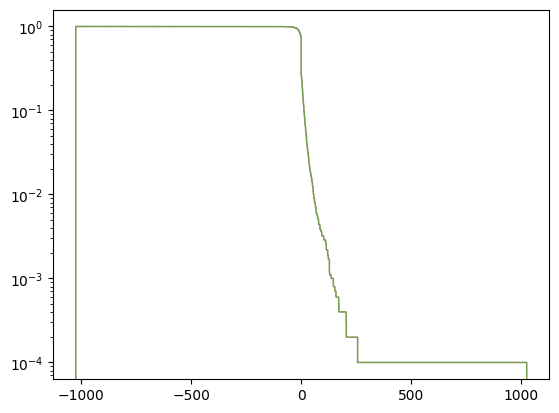

In [ ]:
bin_heights_list = []
for result in return_data_Stoch_horizons_100_runs:
    bin_heights = plt.hist(result, bins=100000, cumulative=-1, density=True, log=True, histtype='step', alpha=0.5)[0]
    bin_heights_list.append(bin_heights)

#checking if each bin height is the same (should not be the case)
for i in range(10):
    print(bin_heights_list[0] == bin_heights_list[i])

# Model validation

This section consists two parts: 
1) comparing the simulated daily return data vs. the emperical daily return data + relevant plots & statistical tests
2) comparing the simulated daily trading volume data vs. the emperical trading volume data + relevant plots & statistical tests

#### Notes on the dataset



Data is obtained from the period 2013-2022 (10 years), while Feng et al's (2012) compared their simulated results to emperical data from the 10 year period from 1997-2006.

Some notable remarks on comparison between the datasets:

* Feng et al. considered the S&P 500, but only stocks listed for the entire period, which were 307, in our case we had 463 stocks, a notable increase.
* We obtained volume and shares outstanding data from Compustat database via WRDS, while obtaining open and closing data from Yahoo finance while Feng et al obtained all these variables from the compustat database.
* Where volume, sharesoutsanding, open or close data was missing for a certain day, we imputed the values using a backfill method.
* Stocks listed may have changed over time, while we only see the ones that stayed listed (survivor bias)



### Comparing simulated daily resturn vs. real stock daily return data

In [ ]:
## 1. Simulated vs. empirical daily return data

#### Importing real stock data

In [ ]:
# changing index to datetime
df_returns_clean_WRDS.index = pd.to_datetime(df_returns_clean_WRDS.index)


In [ ]:
# calculation of returns following feng et al. (2012) method:
df_real_returns_log_difference = df_close_clean.apply(np.log) - df_open_clean.apply(np.log) 

# taking absolute of real returns
df_real_returns_log_difference_abs = df_real_returns_log_difference.abs()

# taking pct change returns
df_real_returns_pct_change = ((df_close_clean - df_open_clean)/df_open_clean).dropna()

In [ ]:
df_real_returns_pct_change.abs()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,0.006877,0.018950,0.013607,0.008649,0.005727,0.002294,0.007740,0.000000,0.021749,0.011076,...,0.022807,0.014609,0.012949,0.010480,0.007459,0.004705,0.005037,0.001479,0.022977,0.005027
2013-01-03,0.002146,0.025678,0.004942,0.010550,0.004857,0.003215,0.011246,0.000452,0.000727,0.010225,...,0.001030,0.006494,0.003286,0.001017,0.002222,0.003273,0.006703,0.013879,0.005148,0.001364
2013-01-04,0.017086,0.067391,0.011959,0.018567,0.006644,0.010875,0.007801,0.007222,0.003918,0.006600,...,0.004786,0.007087,0.002561,0.005198,0.005427,0.005089,0.013049,0.004366,0.003950,0.028610
2013-01-07,0.001174,0.003381,0.003008,0.003640,0.009078,0.002975,0.009691,0.003383,0.004520,0.003438,...,0.006143,0.003810,0.006232,0.004303,0.005161,0.006620,0.001471,0.006254,0.008134,0.000888
2013-01-08,0.006122,0.018133,0.013667,0.007369,0.016915,0.000229,0.001802,0.001584,0.007708,0.009529,...,0.009867,0.000413,0.003325,0.007515,0.005901,0.009283,0.009938,0.001735,0.006888,0.018222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.001476,0.015987,0.009725,0.007180,0.001775,0.004728,0.004737,0.007471,0.001129,0.010299,...,0.014171,0.000124,0.014155,0.016176,0.016608,0.001095,0.003660,0.005955,0.005509,0.003521
2022-12-27,0.002144,0.007132,0.012144,0.010276,0.003058,0.005882,0.002030,0.003787,0.002294,0.008609,...,0.003188,0.035359,0.008170,0.008420,0.004385,0.006637,0.004640,0.002205,0.006617,0.003905
2022-12-28,0.011283,0.015975,0.002415,0.027994,0.008980,0.012975,0.010915,0.016805,0.011199,0.020086,...,0.024833,0.041068,0.009961,0.013921,0.037589,0.016964,0.006759,0.011378,0.014532,0.018416


In [ ]:
# Flattening dataframes to combine all the percentage changes for figures
real_returns_pct_change_flattened = df_real_returns_pct_change.abs().dropna().values.flatten()
real_returns_log_difference_abs_flattened = df_real_returns_log_difference_abs.values.flatten()

In [ ]:
sorted_non_log = sorted(real_returns_pct_change_flattened)
sorted_log = sorted(real_returns_log_difference_abs_flattened)

#### plotting real stock return data with different transformations

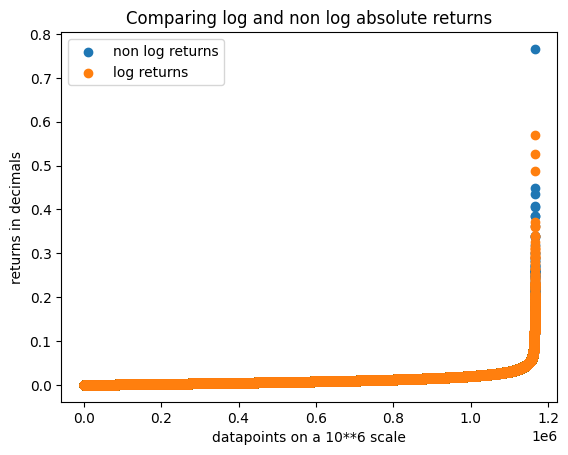

In [ ]:
x = np.arange(0, len(sorted_non_log), 1)
plt.scatter(x, sorted_non_log, label='non log returns')
plt.scatter(x, sorted_log, label ='log returns')
plt.title('Comparing log and non log absolute returns')
plt.xlabel('datapoints on a 10**6 scale')
plt.ylabel('returns in decimals')
plt.legend()
plt.show()

In [ ]:
# normalization of real returns
real_returns_pct_change_flattened_normalized = (real_returns_pct_change_flattened - np.mean(real_returns_pct_change_flattened)) / np.std(real_returns_pct_change_flattened)
real_returns_log_difference_abs_flattened_normalized = (real_returns_log_difference_abs_flattened - np.mean(real_returns_log_difference_abs_flattened)) / np.std(real_returns_log_difference_abs_flattened)

In [ ]:
# real_returns_log_difference_abs_flattened = real_returns_log_difference_abs_flattened/10

In [ ]:
y_1_stoch = np.array(abs_returns_horizons)
y_2_stoch = np.array(abs_returns)
y_3_ABM = np.array(returns)

return_datasets = [y_1_stoch, y_2_stoch, y_3_ABM, real_returns_pct_change_flattened*100, real_returns_log_difference_abs_flattened]
labels = ['Stochastic model with time horizons', 'Stochastic model without time horizons', 'Agent based model', 'Real returns pct change', 'Real returns log difference']


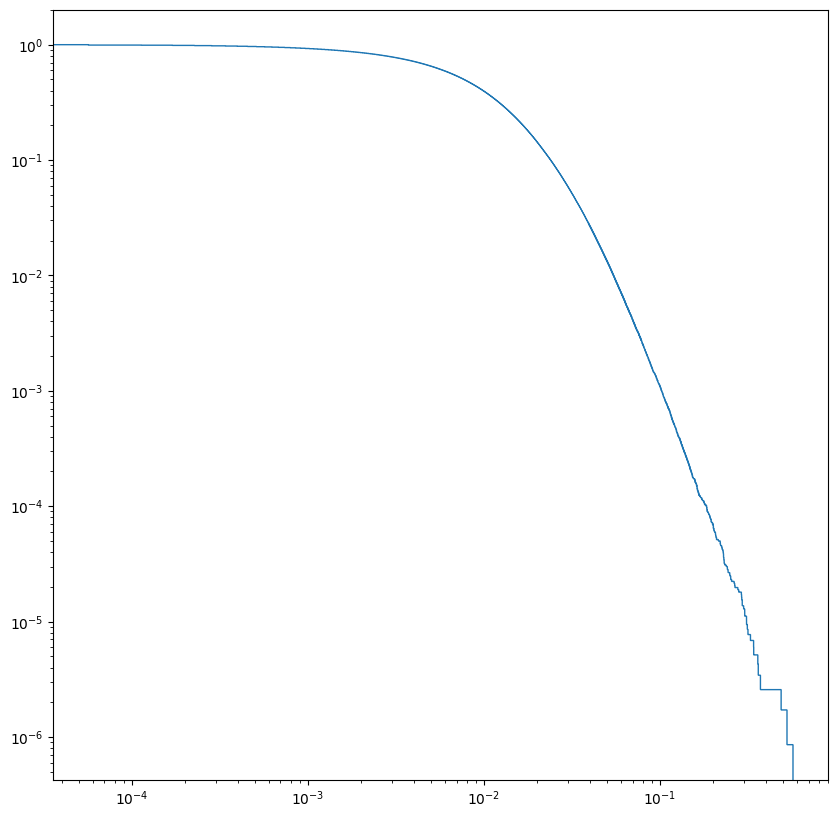

In [ ]:
plt.figure(figsize=(10,10))
plt.hist(real_returns_log_difference_abs_flattened, bins=10000, cumulative=-1, density=True, log=True, histtype='step')
# for i in range(len(return_datasets)):
#     plt.hist(return_datasets[i], bins=10000, cumulative=-1, density=True, log=True, histtype='step', label = labels[i])
plt.gca().set_xscale("log")
plt.show()

### Comparing real vs. simulated return data

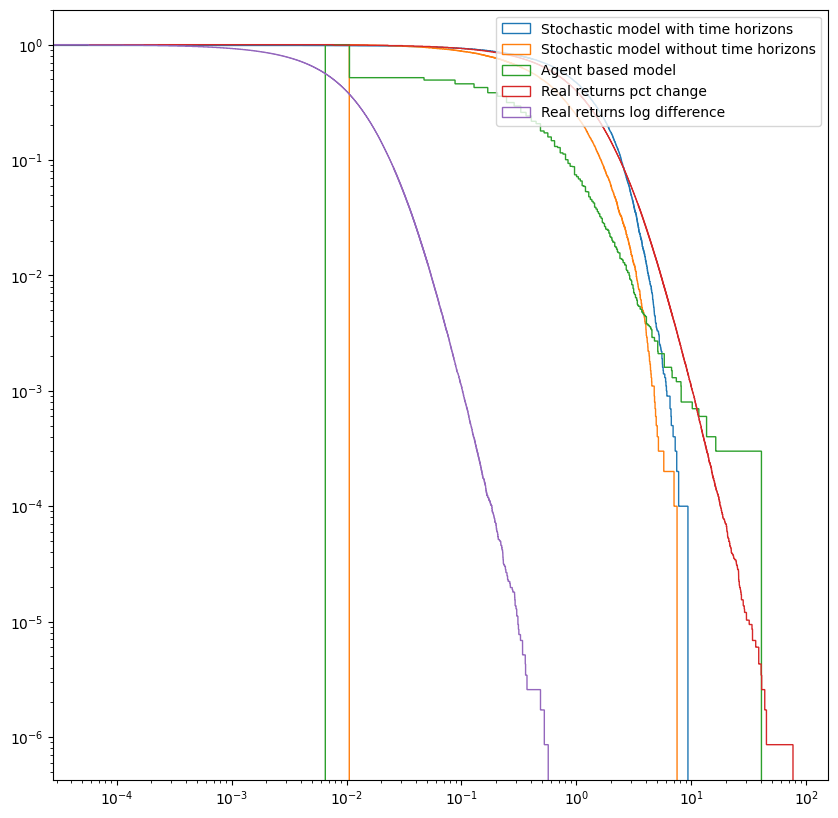

In [ ]:
# non-log plot
plt.figure(figsize=(10,10))
for i in range(len(return_datasets)):
    plt.hist(return_datasets[i], bins=10000, cumulative=-1, density=True, log=True, histtype='step', label = labels[i])
plt.gca().set_xscale("log")
plt.legend()
plt.show()

### RMSE

In [ ]:
def RMSE(predictions:list[float], targets:list[float]) -> float:
    '''Returns the root mean squared error between predictions and target values as a float'''
    return np.sqrt(((predictions - targets) ** 2))

In [ ]:
model_results = [y_1_stoch, y_2_stoch, y_3_ABM]

for result in model_results:
    print(RMSE(result, real_returns_log_difference_abs_flattened))


ValueError: operands could not be broadcast together with shapes (10001,) (1165834,) 

In [ ]:
# code for kolmogorov-smirnov test for similarity of distributions: reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html
# assumed samples are independent

# making a matrix in which ks test results will be visualised

array_for_ks_test_results = np.zeros(((len(return_datasets), len(return_datasets))))
for i in range(len(return_datasets)):
    for j in range(len(return_datasets)):
        # returning the 1st element of ks test result as this is the p-value of the ks test
        # print(stats.kstest(return_datasets[i], return_datasets[j])[1])
            array_for_ks_test_results[i,j] = stats.kstest(return_datasets[i], return_datasets[j])[1]

In [ ]:
df_of_kstest_results = pd.DataFrame(array_for_ks_test_results)
df_of_kstest_results

,0,1,2,3,4
0,1.000000e+00,4.655128e-287,0.000000e+00,2.546482e-55,0.0
1,4.655128e-287,1.000000e+00,1.362420e-190,2.380721e-284,0.0
2,0.000000e+00,1.362420e-190,1.000000e+00,0.000000e+00,0.0
3,2.546482e-55,2.380721e-284,0.000000e+00,1.000000e+00,0.0
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0


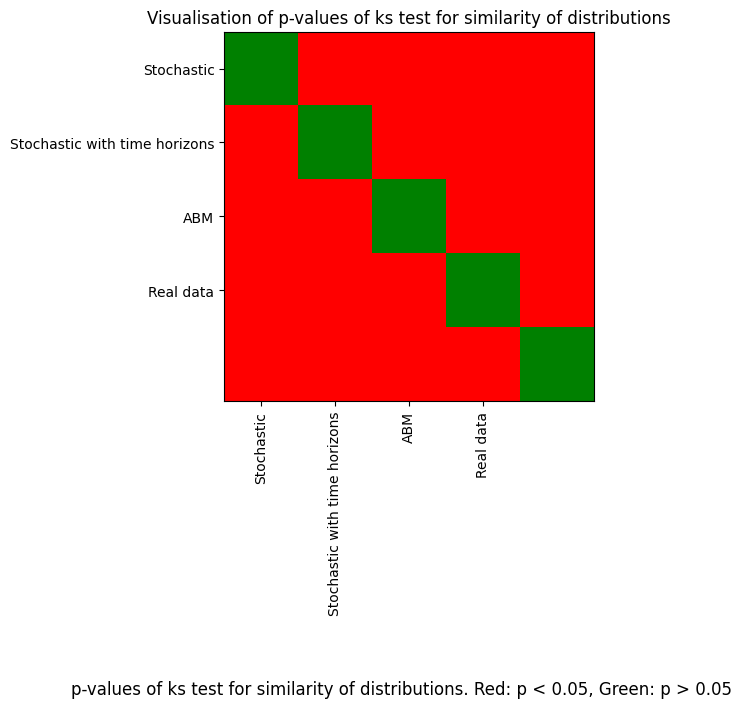

In [ ]:
color_matrix = np.where(array_for_ks_test_results < 0.05, 0,1)
cmap = (mpl.colors.ListedColormap(['red', 'green']))
plt.imshow(color_matrix, cmap=cmap, vmin=0, vmax=1)
plt.xticks([0,1,2,3], ['Stochastic', 'Stochastic with time horizons', 'ABM', 'Real data'], rotation = 90)
plt.yticks([0,1,2,3], ['Stochastic', 'Stochastic with time horizons', 'ABM', 'Real data'])
plt.title("Visualisation of p-values of ks test for similarity of distributions")
plt.figtext(0.5, -0.5, "Red: p < 0.05, Green: p > 0.05", wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

### Empirical trading volume data probability graph

In [55]:
vol_mean = np.mean(df_volume_clean.values.flatten()) # Calculate the mean of all the daily volume
df_normalized_vol = df_volume_clean/vol_mean
sorted_vol = np.sort(df_normalized_vol.values.flatten())

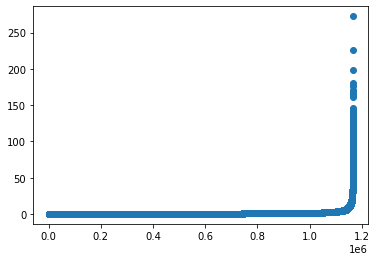

No handles with labels found to put in legend.


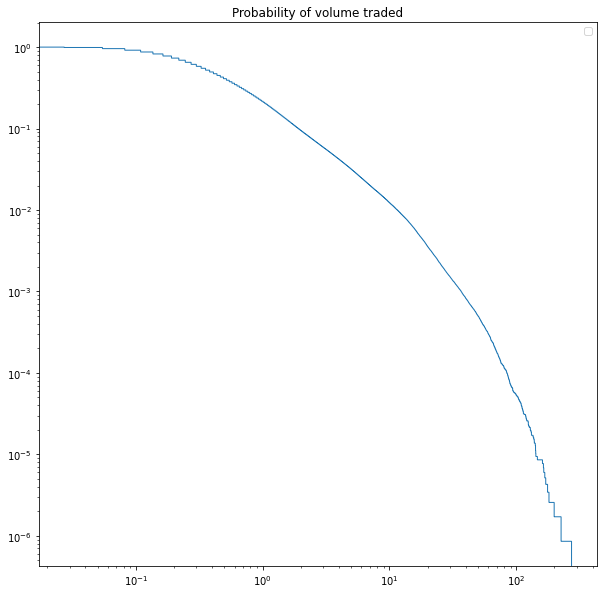

In [57]:
# scatter plot 
x = np.arange(0, len(sorted_vol), 1)
plt.scatter(x, sorted_vol)
plt.show()

# non-log plot
plt.figure(figsize=(10,10))
plt.hist(sorted_vol, bins=10000, cumulative=-1, density=True, log=True, histtype='step')
plt.gca().set_xscale("log")
plt.title('Probability of volume traded')
plt.legend()
plt.show()

## 2. Simulated vs. emperical trading volume data

#### Normalizing emperical volume data

In [ ]:
df_volume_clean_wrds

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,6290038.0,43167060.0,800421.0,19986670.0,13767660.0,1972401.0,20266410.0,977536.0,4039095.0,6483720.0,...,6594952.0,2486815.0,2702053.0,16144970.0,856539.0,927252.0,4376855.0,1397462.0,213748.0,2551059.0
2013-01-03,4114289.0,43167060.0,520539.0,12579170.0,16739210.0,2027242.0,22148090.0,655362.0,3340674.0,3905904.0,...,3967047.0,1731879.0,2403510.0,13268470.0,525445.0,610706.0,2627253.0,1574966.0,99849.0,2267804.0
2013-01-04,4601506.0,43167060.0,614933.0,21196320.0,21372200.0,2462183.0,15819140.0,530563.0,3145680.0,3809146.0,...,3624749.0,2129025.0,1743995.0,11427870.0,660389.0,563325.0,2719375.0,1189537.0,145944.0,3577660.0
2013-01-07,2567557.0,43167060.0,1051969.0,17262620.0,17896920.0,1803504.0,13121470.0,423123.0,2262426.0,3632022.0,...,2450680.0,1500928.0,2853210.0,11799780.0,554059.0,481287.0,3729703.0,954238.0,90581.0,2285917.0
2013-01-08,2787813.0,43167060.0,840003.0,16350190.0,17863000.0,1533163.0,15053860.0,580903.0,2468876.0,3080868.0,...,5203250.0,975921.0,3762904.0,14228400.0,698803.0,1084482.0,12406140.0,905965.0,112590.0,3758558.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,779426.0,17160810.0,524534.0,63755280.0,2684724.0,528005.0,2618369.0,890265.0,1213251.0,1627915.0,...,1932785.0,1134475.0,1201346.0,11534290.0,1264320.0,321094.0,699735.0,789770.0,180932.0,1263345.0
2022-12-27,879543.0,18836880.0,717073.0,68887690.0,2669090.0,740310.0,2927352.0,666705.0,1009563.0,1463215.0,...,2265992.0,4024281.0,1580610.0,11874640.0,998778.0,468173.0,1299183.0,742499.0,252510.0,704184.0
2022-12-28,784312.0,20388570.0,685513.0,85247210.0,2944327.0,804725.0,3264409.0,1107929.0,1386969.0,1668511.0,...,2244112.0,2131050.0,1513689.0,10675270.0,1430535.0,480378.0,964755.0,750108.0,241209.0,679957.0


In [ ]:
 df_volume_clean_wrds.resample('Y').mean().sum(axis=1)

Date
2013-12-31    2.273725e+09
2014-12-31    2.081439e+09
2015-12-31    2.183814e+09
2016-12-31    2.282949e+09
2017-12-31    2.031400e+09
2018-12-31    2.299419e+09
2019-12-31    1.918719e+09
2020-12-31    2.552718e+09
2021-12-31    2.057483e+09
2022-12-31    2.351651e+09
Freq: A-DEC, dtype: float64

In [ ]:
df_volume_clean_wrds

NameError: name 'df_volume_clean_wrds' is not defined

In [ ]:
mean_yearly_volume_per_stock = df_volume_clean_wrds.resample('Y').mean()


In [ ]:
summed_yearly_volume_per_stock = df_volume_clean_wrds.sum()

In [ ]:
summed_yearly_volume_per_stock.mean(axis=1)


Date
2013-12-31    1.237535e+09
2014-12-31    1.132878e+09
2015-12-31    1.188599e+09
2016-12-31    1.242555e+09
2017-12-31    1.101256e+09
2018-12-31    1.246553e+09
2019-12-31    1.044313e+09
2020-12-31    1.394898e+09
2021-12-31    1.119839e+09
2022-12-31    1.274869e+09
Freq: A-DEC, dtype: float64

In [ ]:
mean_yearly_volume_per_stock

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2013-12-31,3.045449e+06,4.131149e+07,7.816195e+05,1.445025e+07,6.257611e+06,1.990433e+06,8.060460e+06,4.436165e+05,3.099721e+06,3.592994e+06,...,4.695080e+06,1.250706e+06,3.301607e+06,1.262712e+07,7.688385e+05,1.255856e+06,3.634615e+06,1.054791e+06,174106.337302,2.078601e+06
2014-12-31,2.272985e+06,1.238078e+07,7.949913e+05,3.452680e+07,9.130938e+06,1.698106e+06,6.013064e+06,5.164888e+05,2.799480e+06,3.354736e+06,...,4.641452e+06,1.795404e+06,2.740702e+06,1.172101e+07,8.334123e+05,1.013436e+06,3.152440e+06,1.237488e+06,471274.000000,2.466435e+06
2015-12-31,2.559315e+06,1.153099e+07,1.059096e+06,5.164626e+07,1.046825e+07,2.043598e+06,5.817286e+06,4.519217e+05,2.481861e+06,2.791614e+06,...,3.727376e+06,3.208687e+06,3.302383e+06,1.406299e+07,9.482419e+05,1.137982e+06,4.075438e+06,1.231677e+06,530913.865079,2.707760e+06
2016-12-31,2.081338e+06,9.160580e+06,1.033338e+06,3.826767e+07,7.995381e+06,2.543463e+06,9.061932e+06,3.796295e+05,2.555518e+06,2.822106e+06,...,4.968402e+06,3.417733e+06,3.267105e+06,1.239459e+07,1.649353e+06,1.312734e+06,3.469905e+06,1.571417e+06,648893.698413,3.363428e+06
2017-12-31,1.846746e+06,5.862530e+06,1.657572e+06,2.700270e+07,5.967196e+06,1.785437e+06,6.598606e+06,4.590920e+05,2.114190e+06,2.460035e+06,...,3.253748e+06,1.987586e+06,2.628906e+06,1.090880e+07,1.621055e+06,1.178522e+06,2.142878e+06,1.359164e+06,328787.872510,2.478809e+06
2018-12-31,2.544049e+06,6.842145e+06,1.142888e+06,3.376838e+07,7.019459e+06,1.546483e+06,6.179530e+06,9.331440e+05,2.235993e+06,3.259894e+06,...,4.486538e+06,3.151586e+06,3.682863e+06,1.348126e+07,2.712300e+06,1.103273e+06,2.110327e+06,1.193503e+06,402520.378486,2.351557e+06
2019-12-31,2.149770e+06,6.974919e+06,1.125318e+06,2.794224e+07,7.814414e+06,1.326785e+06,5.144075e+06,1.241748e+06,1.851884e+06,2.651977e+06,...,4.126360e+06,2.032719e+06,3.203835e+06,1.159706e+07,1.669033e+06,8.411636e+05,1.710212e+06,1.133707e+06,558678.773810,2.232458e+06
2020-12-31,1.849400e+06,6.772373e+07,9.835181e+05,7.297082e+07,9.429728e+06,1.288009e+06,6.686208e+06,2.038213e+06,2.315411e+06,3.065785e+06,...,5.043295e+06,4.745901e+06,3.070552e+06,2.876056e+07,1.803349e+06,1.169193e+06,2.150342e+06,1.376043e+06,407713.592885,2.556167e+06
2021-12-31,1.619945e+06,3.812482e+07,7.704331e+05,9.012147e+07,6.804253e+06,9.788828e+05,5.343656e+06,2.040180e+06,1.987258e+06,2.365483e+06,...,4.343849e+06,3.344809e+06,2.941258e+06,2.387800e+07,1.500157e+06,8.670148e+05,1.538044e+06,1.373060e+06,279893.392857,1.330721e+06


In [ ]:
summed_yearly_volume_per_stock

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2013-12-31,767453144.0,1.041050e+10,196968125.0,3.641464e+09,1.576918e+09,501589171.0,2.031236e+09,111791346.0,781129646.0,905434416.0,...,1.183160e+09,3.151779e+08,832004873.0,3.182034e+09,193747292.0,316475586.0,9.159229e+08,265807348.0,43874797.0,523807529.0
2014-12-31,572792205.0,3.119956e+09,200337816.0,8.700754e+09,2.300996e+09,427922742.0,1.515292e+09,130155176.0,705468864.0,845393387.0,...,1.169646e+09,4.524419e+08,690657014.0,2.953694e+09,210019905.0,255385755.0,7.944149e+08,311846858.0,118761048.0,621541534.0
2015-12-31,644947386.0,2.905810e+09,266892101.0,1.301486e+10,2.638000e+09,514986674.0,1.465956e+09,113884277.0,625429030.0,703486686.0,...,9.392988e+08,8.085892e+08,832200460.0,3.543873e+09,238956966.0,286771494.0,1.027010e+09,310382529.0,133790294.0,682355398.0
2016-12-31,524497072.0,2.308466e+09,260401211.0,9.643454e+09,2.014836e+09,640952754.0,2.283607e+09,95666634.0,643990584.0,711170803.0,...,1.252037e+09,8.612687e+08,823310527.0,3.123437e+09,415636987.0,330809056.0,8.744160e+08,395997079.0,163521212.0,847583846.0
2017-12-31,463533363.0,1.471495e+09,416050529.0,6.777678e+09,1.497766e+09,448144752.0,1.656250e+09,115232093.0,530661713.0,617468777.0,...,8.166907e+08,4.988840e+08,659855408.0,2.738108e+09,406884728.0,295809059.0,5.378625e+08,341150227.0,82525756.0,622180999.0
2018-12-31,638556192.0,1.717378e+09,286864831.0,8.475864e+09,1.761884e+09,388167302.0,1.551062e+09,234219148.0,561234169.0,818233399.0,...,1.126121e+09,7.910482e+08,924398608.0,3.383795e+09,680787272.0,276921522.0,5.296921e+08,299569167.0,101032615.0,590240925.0
2019-12-31,541741999.0,1.757680e+09,283580145.0,7.041445e+09,1.969232e+09,334349821.0,1.296307e+09,312920482.0,466674709.0,668298320.0,...,1.039843e+09,5.122453e+08,807366295.0,2.922459e+09,420596285.0,211973217.0,4.309735e+08,285694055.0,140787051.0,562579511.0
2020-12-31,467898125.0,1.713410e+10,248830071.0,1.846162e+10,2.385721e+09,325866310.0,1.691611e+09,515667954.0,585799043.0,775643483.0,...,1.275954e+09,1.200713e+09,776849560.0,7.276422e+09,456247392.0,295805943.0,5.440366e+08,348138802.0,103151539.0,646710209.0
2021-12-31,408226151.0,9.607454e+09,194149148.0,2.271061e+10,1.714672e+09,246678461.0,1.346601e+09,514125398.0,500788983.0,596101759.0,...,1.094650e+09,8.428919e+08,741197083.0,6.017257e+09,378039671.0,218487732.0,3.875870e+08,346011189.0,70533135.0,335341777.0


In [ ]:
normalized_yearly_volume_per_stock = summed_yearly_volume_per_stock/mean_yearly_volume_per_stock
normalized_yearly_volume_per_stock

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2013-12-31,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,...,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0
2014-12-31,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,...,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0
2015-12-31,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,...,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0
2016-12-31,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,...,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0
2017-12-31,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,...,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0
2018-12-31,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,...,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0
2019-12-31,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,...,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0
2020-12-31,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,...,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0
2021-12-31,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,...,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0


In [ ]:
summed_yearly_volume

A       5.456551e+09
AAL     5.929510e+10
AAP     2.573681e+09
AAPL    1.204554e+11
ABBV    1.948171e+10
            ...     
XYL     2.770121e+09
YUM     6.493333e+09
ZBH     3.252852e+09
ZBRA    1.069625e+09
ZION    5.799837e+09
Length: 463, dtype: float64

In [ ]:
summed_yearly_volume

A       5.456551e+09
AAL     5.929510e+10
AAP     2.573681e+09
AAPL    1.204554e+11
ABBV    1.948171e+10
            ...     
XYL     2.770121e+09
YUM     6.493333e+09
ZBH     3.252852e+09
ZBRA    1.069625e+09
ZION    5.799837e+09
Length: 463, dtype: float64

In [ ]:
summed_yearly_volume_normalized = summed_yearly_volume - np.mean(summed_yearly_volume)

# Parameter tuning & further analysis

# Code below this is unfinished / not used yet

In [ ]:
# The following Hill estimator is from https://github.com/alinasode/hill-estimator/blob/main/utils/functions.py
# We use it by instead of giving it the whole dataset, we only give it the tail region we want it to calculate
# Since this function returns an np.array of different HE values for all the datapoint spots, we take the mean of this np.array 
def Hill_estimator(data):
    """
    Returns the Hill Estimators for some 1D data set.
    """    
    # sort data in such way that the smallest value is first and the largest value comes last:
    Y = np.sort(data)
    n = len(Y)

    Hill_est = np.zeros(n-1)

    for k in range(0, n-1):    # k = 0,...,n-2
        summ = 0

        for i in range(0,k+1):   # i = 0, ..., k
            summ += np.log(Y[n-1-i]) - np.log(Y[n-2-k])
        
        Hill_est[k] = (1 / (k+1)) * summ      # add 1 to k because of Python syntax
  
    kappa = 1. / Hill_est
    return kappa.mean()

data = np.array(sorted_log)
# The last number is the percentile of the tail we want to check
slicer = int(len(data)-len(data)*0.01)
data = data[int(slicer):len(data)]
HE = Hill_estimator(data)
HE.mean()

C:\Users\Nitai Nijholt\AppData\Local\Temp\ipykernel_36560\1585354143.py:15: RuntimeWarning:

divide by zero encountered in log

C:\Users\Nitai Nijholt\AppData\Local\Temp\ipykernel_36560\1585354143.py:15: RuntimeWarning:

invalid value encountered in double_scalars



KeyboardInterrupt: 

In [ ]:
def regression(data_x, data_y, beta, learning_rate, iterations):
    rmse = np.mean([((beta * data_x[i]) - data_y[i])**2 for i in range(len(data_y))])
    diff_beta = beta

    while diff_beta > 10:
        # find differentials of the parametres
        #diff_alpha = 2 * np.mean([((alpha + beta * data_x[i]) - data_y[i]) for i in range(len(data_y))])
        diff_beta = 2 * np.mean([(((data_x[i] * beta) - data_y[i]) * data_x[i]) for i in range(len(data_y))])
        print(diff_beta)

        #alpha_new = alpha + (learning_rate * diff_alpha)
        beta = beta - learning_rate * diff_beta

        rmse_zero_new = np.mean([((beta * data_x[i]) - data_y[i])**2 for i in range(len(data_y))])

        # keep new parametres if they lead to smaller rmse
        #if rmse_zero_new < rmse:
            #alpha = alpha_new
        #beta = beta_new
        rmse = rmse_zero_new

    return beta, rmse

In [ ]:
def r_squared(data, alpha, beta, x_range):
    """
    Goodness of fit test for regression
    """
    ss_res = []
    ss_total = []
    mean = np.mean(data)

    for i in range(x_range):
        prediction = alpha + beta * x_range[i]
        value = data[i]

        residual = (value - prediction) ** 2
        total = (value - mean) ** 2

        ss_res.append(residual)
        ss_total.append(total)

    return 1 - (ss_res / ss_total)


In [ ]:
# k_test - think about ways to fit a power law
k_range = [i*0.1 for i in range(51)]
variances = []

for i in k_range:
    k = i
    k_test = Model(p, n, size, k, omega)
    for step in range(t):
        k_test.step()

    variance = np.std(k_test.daily_returns) ** 2
    variances.append(variance)

TypeError: __init__() missing 1 required positional argument: 'omega'

In [ ]:
variance_array = np.array(variances)
range_array = np.array(k_range).reshape((-1, 1))

regress = LinearRegression().fit(range_array, variance_array)

In [ ]:
k_test = r_squared(variances, regress.intercept_, regress.coef_, k_range)
print(k_test)

In [ ]:
plt.plot(k_range, [(regress.intercept_ + regress.coef_ * i) for i in k_range])
plt.scatter(k_range, variances)
plt.show()

In [ ]:
# omega_test - think about ways to fit a power law
omega_range = [i*0.1 for i in range(1, 51)]
variances = []

for i in omega_range:
    omega = i
    omega_test = Model(p, n, size, k, omega)
    for step in range(t):
        omega_test.step()

    variance = np.std(omega_test.daily_returns) ** 2
    variances.append(variance)

omega_array = np.array(omega_range).reshape((-1, 1))
omega_variances = np.array(variances)

TypeError: __init__() missing 1 required positional argument: 'omega'

In [ ]:
# omega - calculate regression of power law exponent and variances
omega_r = LinearRegression().fit(omega_array, omega_variances)
omega_test = r_squared(variances, omega_r.intercept_, omega_r.coef_, omega_range)

TypeError: regression() missing 2 required positional arguments: 'learning_rate' and 'iterations'

In [ ]:
# p_test - variances; mean number of zeros
p_range = [i*0.1 for i in range(1, 6)]
variances = []
zeros = []

for i in p_range:
    p = i
    p_test = Model(p, n, size, k, omega)
    for step in range(100):
        p_test.step()

    variance = np.std(p_test.daily_returns) ** 2
    variances.append(variance)

    for u in p_test.daily_returns:
        zero = []
        if -0.5 < u < 0.5:
            zero.append(1)
        
    zero_add = sum(zero) / len(p_test.daily_returns)
    zeros.append(zero_add)

    print(i)

p_array = np.array(p_range).reshape((-1, 1))
p_variances = np.array(variances)
p_zeros = np.array(zeros)

In [ ]:
p_zeros_r = LinearRegression().fit(p_array, p_zeros)
p_variances_r = LinearRegression().fit(p_array, p_variances)

p_test_zeros = r_squared(zeros, p_zeros_r.intercept_, p_zeros_r.coef_, p_range)
p_test_variances = r_squared(variances, p_variances_r.intercept_, p_variances_r.coef_, p_range)

In [ ]:
plt.plot(p_range, [(p_variances_r.intercept_ + p_variances_r.coef_ * i) for i in p_range])
plt.scatter(p_range, variances)
plt.show()

In [ ]:
print("R^2 of variance fit =", p_test_variances)
print("R^2 of mean zero fit =", p_test_zeros)

In [ ]:
# M
m_range = [i for i in range(1, 500)]
variances = []

for i in m_range:
    m_test = Stochastic_Model(n, p, 10, True, i, 1.12)
    for step in range(t):
        m_test.step()

    variance = np.std(m_test.returns) ** 2
    variances.append(variance)

m_array = np.array(m_range).reshape((-1, 1))
m_variances = np.array(variances)

In [ ]:
m_variances_r = LinearRegression().fit(m_array, m_variances)
m_test = r_squared(variances, m_variances_r.intercept_, m_variances_r.coef_, m_range)

In [ ]:
plt.plot(m_range, [(m_variances_r.intercept_ + m_variances_r.coef_ * i) for i in m_range])
plt.scatter(m_range, variances)
plt.show()

In [ ]:
print("R^2 of variance fit =", m_test)


In [ ]:
# D
d_range = [i*0.1 for i in range(1, 21)]
variances = []

for i in d_range:
    d_test = Stochastic_Model(n, p, 10, True, 500, i)
    for step in range(t):
        d_test.step()

    variance = np.std(d_test.daily_returns) ** 2
    variances.append(variance)

d_array = np.array(d_range).reshape((-1, 1))
d_variances = np.array(variances)

In [ ]:
# Example of parameter generation
parameters = np.arange(0, 10, 1)
print("parameters to test:", parameters)


def gridsearch(real, abm_or_stoch, parameters):
    best_param = 0
    best_loss = 1000000000
    for param in parameters:
        if abm_or_stoch == 'abm':
            model_test = Model(p, n, size, k, omega) # change the parameter to test to "param"
            for i in range(t):
                model_test.step()
            abs_returns = [abs(day) for day in model_test.daily_returns]
            result = np.array(abs_returns)
        else:
            stochastic = Stochastic_Model(n, p, 10, time_horizon=False, M=10, d=1.12)
            stochastic_horizons = Stochastic_Model(n, p, 10, time_horizon=True, M=10, d=1.12)
            for i in range(t):
                stochastic.step()
                stochastic_horizons.step()
            abs_returns = [abs(i) for i in stochastic.returns]
            result = np.array(abs_returns)
        rmse = np.sqrt(mean_squared_error(real, result))
        if rmse < best_loss:
            best_param = current_param
            best_loss = rmse
    return best_param, best_loss

# Implementation from https://archive.lib.msu.edu/crcmath/math/math/l/l142.html
def exp_lsq(x, y):
    n = len(bin) # sample size?
    ln_y = np.log(y, where= y != 0)
    sum_ln_y = np.sum(ln_y)
    sum_x = np.sum(x)
    sum_x_ln_y = np.sum(x * ln_y)
    print('sum_ln_y', sum_ln_y, 'sum_x', sum_x)
    a = (sum_ln_y * sum_x**2 - sum_x*sum_x_ln_y) / (n * np.sum(x**2) - sum_x**2)
    b = (n * sum_x_ln_y - sum_x*sum_ln_y)/(n * np.sum(x**2) - sum_x**2)
    return a, b

In [ ]:
a, b = exp_lsq(bin, real_bins)
print(a,b)
x = np.arange(0, len(bin), 1)
y = np.exp(a)*math.e**(b*x)
plt.scatter(x,y)